In [44]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
import seaborn as sns

from sklearn import metrics
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix  


from sklearn.ensemble import RandomForestClassifier  
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier  


In [45]:
pd.options.display.max_columns=100 

In [46]:
df = pd.read_csv('./walmart_sales.csv')

In [47]:
#df = df.sort_values(by='Date', ascending=True) 

In [48]:
df = df.drop(['Date'], axis=1)

In [49]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,1,1,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,0,5,2,2010
1,1,2,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,0,5,2,2010
2,1,3,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,0,5,2,2010
3,1,4,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,0,5,2,2010
4,1,5,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,0,5,2,2010


In [50]:
features = df.drop('Type', axis = 1)
labels = df['Type']

In [51]:
#drop_col = ['Fuel_Price','Temperature','CPI','Unemployment']
#features.drop(drop_col, axis=1, inplace=True)

In [52]:
x_train=features[:int(0.7*(len(df)))] 
x_test= features[int(0.7*(len(df))):] 
y_train=labels[:int(0.7*(len(df)))] 
y_test= labels[int(0.7*(len(df))):]

In [53]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420212 entries, 0 to 420211
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420212 non-null  int64  
 1   Dept          420212 non-null  int64  
 2   Weekly_Sales  420212 non-null  float64
 3   IsHoliday     420212 non-null  int64  
 4   MarkDown1     420212 non-null  float64
 5   MarkDown2     420212 non-null  float64
 6   MarkDown3     420212 non-null  float64
 7   MarkDown4     420212 non-null  float64
 8   MarkDown5     420212 non-null  float64
 9   Size          420212 non-null  int64  
 10  Super_Bowl    420212 non-null  int64  
 11  Labor_Day     420212 non-null  int64  
 12  Thanksgiving  420212 non-null  int64  
 13  Christmas     420212 non-null  int64  
 14  week          420212 non-null  int64  
 15  month         420212 non-null  int64  
 16  year          420212 non-null  int64  
dtypes: float64(6), int64(11)
memory usage: 54.5 MB


TH1: Random Forest

In [54]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
scaler = RobustScaler()

pipe = make_pipeline(scaler,classifier)

pipe.fit(x_train, y_train)

y_pred_test = pipe.predict(x_test)

pipe.score(x_test,y_test)

0.7927163980200533

In [55]:
cm = metrics.confusion_matrix(y_test,y_pred_test)

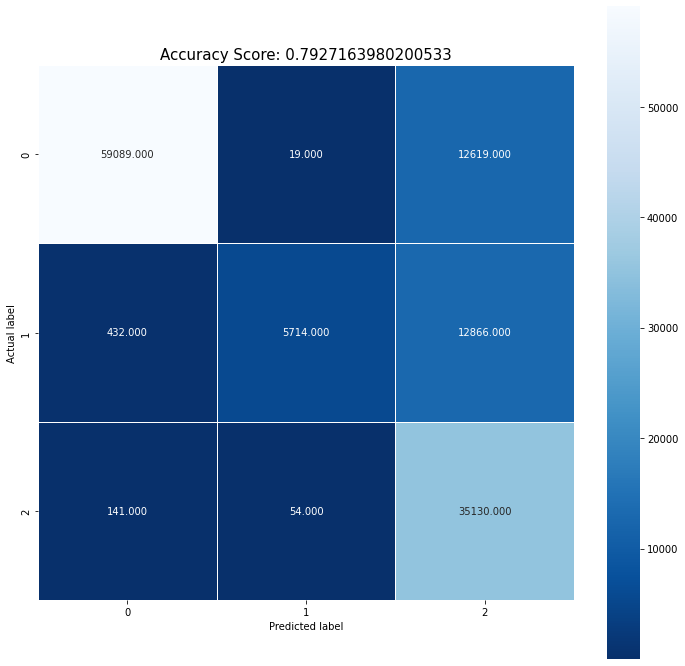

In [56]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap= 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: {0}'.format(pipe.score(x_test,y_test))
plt.title(title, size = 15);

TH2: Naive Bayes

In [57]:
classifier= GaussianNB()  
scaler = RobustScaler()

pipe = make_pipeline(scaler,classifier)

pipe.fit(x_train, y_train)

y_pred_test = pipe.predict(x_test)

pipe.score(x_test,y_test)

0.5065680923975123

In [58]:
cm = metrics.confusion_matrix(y_test,y_pred_test)

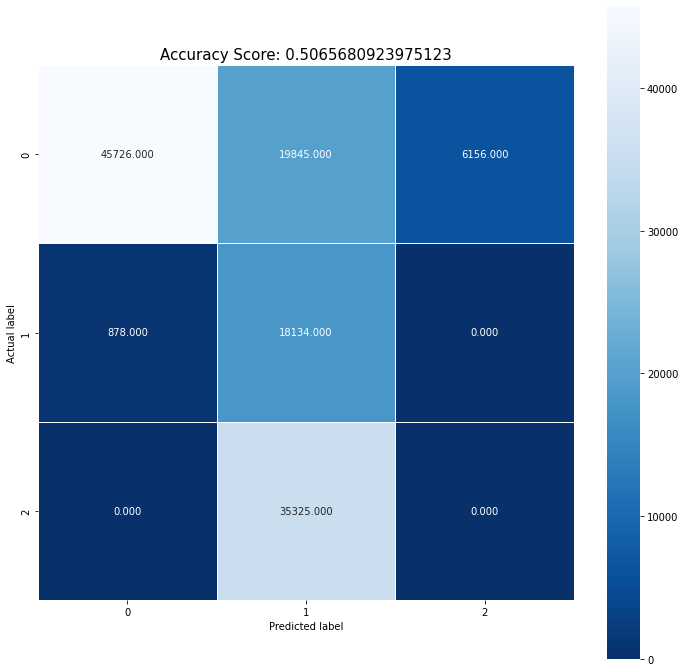

In [59]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap= 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: {0}'.format(pipe.score(x_test,y_test))
plt.title(title, size = 15);

TH3: Decison Tree (ID3)

In [60]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
scaler = RobustScaler()

pipe = make_pipeline(scaler,classifier)

pipe.fit(x_train, y_train)

y_pred_test = pipe.predict(x_test)

pipe.score(x_test,y_test)

0.7486435461352964

In [61]:
cm = metrics.confusion_matrix(y_test,y_pred_test)

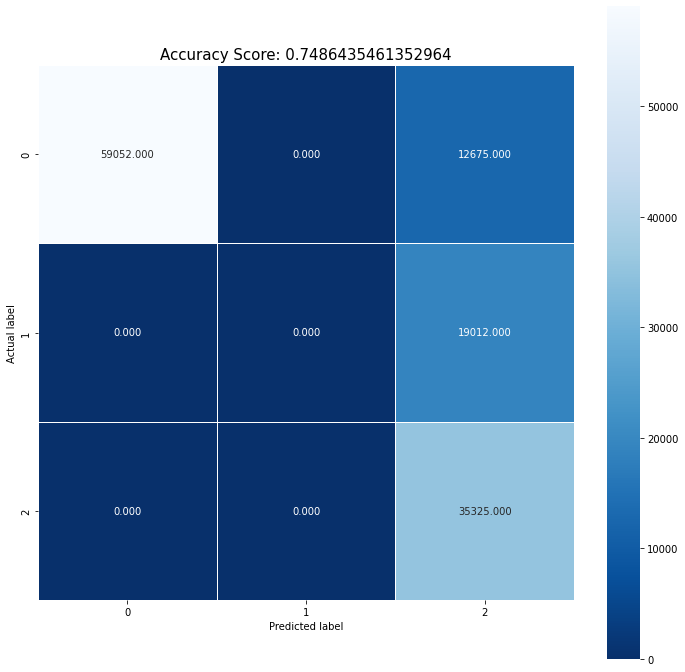

In [62]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap= 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: {0}'.format(pipe.score(x_test,y_test))
plt.title(title, size = 15);

TH4: Decison Tree (CART)

In [63]:
classifier= DecisionTreeClassifier(criterion='gini', random_state=0)   
scaler = RobustScaler()

pipe = make_pipeline(scaler,classifier)

pipe.fit(x_train, y_train)

y_pred_test = pipe.predict(x_test)

pipe.score(x_test,y_test)

0.7486435461352964

In [64]:
cm = metrics.confusion_matrix(y_test,y_pred_test)

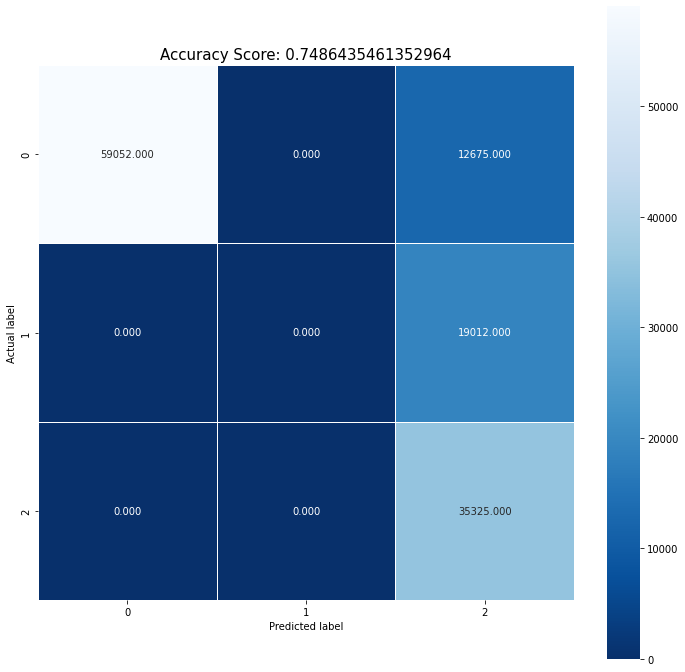

In [65]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap= 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: {0}'.format(pipe.score(x_test,y_test))
plt.title(title, size = 15);